# [BERTによる類似文書の検索](https://lab.m-field.co.jp/2020/11/30/search-by-bert/)

## TimeZone

In [ ]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

Fri Jul 16 10:22:43 JST 2021


## 変数設定

In [ ]:
# clients = ["kosfja", "clb", "nu"]
# clients = ["clb"]
# clients = ["nu-chat", "sbd-chat", "ues-chat"]
clients = ["nu-chat"]

In [ ]:
from_date = "2021-01-01"

In [ ]:
#to_date = "2021-03-31"
to_date = "2021-01-31"

In [ ]:
project_id = 'bwing-230309'

## Provide your credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

In [ ]:
%load_ext google.colab.data_table

In [ ]:
from google.cloud import bigquery

def query(project_id, client_id, from_date, to_date):
  client = bigquery.Client(project=project_id)

  print((project_id, client_id, from_date, to_date))
  
  df = client.query(f'''
  SELECT
    app_subdomain AS client,
    content AS text,
  FROM
    `bwing-230309.oksky_chat.content`
  WHERE
    app_subdomain = '{client_id}'
    AND date BETWEEN '{from_date}' AND '{to_date}'
    AND content != ''
    AND is_auto_message IS NOT TRUE
    AND is_customer IS TRUE
    AND regexp_extract(content, '(init|init_bot|テスト)') IS NULL
  ORDER BY timestamp
  ''').to_dataframe()
  # print(df.head(10))
  return df

In [ ]:
import os
import numpy as np

groups = clients

texts  = []
labels = []

for group in groups:
    client_id = group
    df = query(project_id, client_id, from_date, to_date)

    # for t in df['quest_item_name']:
    for t in df['text']:
        if t != []:
            texts.append(t) 
            labels.append(group)
labels = np.array(labels) 

('bwing-230309', 'nu-chat', '2021-01-01', '2021-01-31')


In [ ]:
#print(texts)
len(texts)

8837

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(labels, texts)), columns = ['client', 'text'])

In [ ]:
# df.head()

## 下準備

In [ ]:
%%bash
# データセットのダウンロード
# wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
# tar xvzf ldcc-20140209.tar.gz
# ライブラリのインストール
apt install aptitude swig
aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
#pip install mecab-python3==0.996.5
pip install mecab-python3
#pip install unidic-lite nlplot japanize-matplotlib transformers fugashi ipadic
pip install unidic-lite japanize-matplotlib transformers fugashi ipadic
#pip install nlplot==1.2.0

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  l



ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.


In [ ]:
%%bash
pip install pandas numpy tqdm seaborn matplotlib wordcloud pillow networkx ipython scikit-learn
pip install plotly>=4.12.0 -U
pip install pyLDAvis==2.1.2
pip install nlplot==1.2.0

In [ ]:
!pip install ginza ja-ginza
#!pip install ginza ja-ginza-electra

     |████████████████████████████████| 10.4MB 8.5MB/s 
     |████████████████████████████████| 51.5MB 58kB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 1.1MB 43.6MB/s 
     |████████████████████████████████| 481kB 41.5MB/s 
  Created wheel for ginza: filename=ginza-4.0.6-cp37-none-any.whl size=15793 sha256=9b3c091a2fad0872e37ecf05661967b798dc3411fd75572922c28d4ee8185f61
  Stored in directory: /root/.cache/pip/wheels/7e/37/14/80b8f727f6adb2b00377bca3ddf9d9a999aecff97ee0a3017c
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-cp37-none-any.whl size=51530814 sha256=6fa384fb5fb5d8924059167beba0ae8f07b2abd24283a3f818c775757a87fb4a
  Stored in directory: /root/.cache/pip/wheels/28/5a/c0/95ac590b39eff99c77d729f284341d15a6903e4011d70ff421
  Created wheel for SudachiPy: filename=SudachiPy-0.5.2-cp37-cp37m-linux_x86_64.whl size=870159 sha256=85769154aa81eeb7637a3cbfa0b5f6e735d588ec688f4496519300ba8ff23d42
  Stored in directory: /root/.cac

In [ ]:
#!pip install --upgrade plotly

     |████████████████████████████████| 20.6MB 1.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 7.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=d9d270076261d98d56331df2818fb33246cf0b6b17c497e70e46670cbb900cab
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
  Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

## データセットの読み込み

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import nlplot
import warnings
warnings.simplefilter('ignore')    
import torch
import transformers
from transformers import BertJapaneseTokenizer
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR) # tokenize時の警告を抑制
# def load_dataset():
#     """データセットの読み込み"""
#     paths = []
#     for dirpath, dirnames, filenames in os.walk('./text'):
#         for file in filenames:
#             if re.match(r'.+[0-9].txt',  file):
#                 #print("{0}".format(file))
#                 paths.append(os.path.join(dirpath, file))                
#     data = {
#         'path': [],
#         'URL': [],
#         'date': [],
#         'title': [],
#         'text': [],
#     }
#     for path in paths:
#         with open(path, 'r') as f:
#             url = f.readline().strip('¥n')
#             date = f.readline().strip('¥n')
#             title = f.readline().strip('¥n')
#             text = f.read()
#             data['path'].append(path)
#             data['URL'].append(url)
#             data['date'].append(date)
#             data['title'].append(title)
#             data['text'].append(text)
#     return pd.DataFrame(data)
# df = load_dataset()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



## 文書の特徴ベクトル化

In [ ]:
#!pip install transformers==3.0.0

In [ ]:
class BertExtractor:
    """文書特徴抽出用クラス"""
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPUが使用可能ならGPUを使用
        self.model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking' #使用する学習済みモデル名
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(self.model_name) #使用するBERTトークナイザー
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name) #学習済みモデル呼び出し
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 128 #使用する入力文書の長さ。最大512まで
    
    def extract(self, sentence):
        """文書特徴ベクトルを抽出する"""
        # 文書のトークナイズ
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)
        # 入力トークン数の調整
        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
        # モデルへ文書を入力し特徴ベクトルを取り出す
        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)        
        seq_out, _ = self.bert_model(inputs_tensor, return_dict=False)
        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy() # 0番目は [CLS] token, 768 dim の文章特徴量
        else:
            return seq_out[0][0].detach().numpy()

In [ ]:
def cos_sim_matrix(matrix):
    """文書間のコサイン類似度を計算し、類似度行列を返す"""
    d = matrix @ matrix.T
    norm = (matrix * matrix).sum(axis=1, keepdims=True) ** .5
    return d / norm / norm.T

In [ ]:
bex = BertExtractor()
df['text_feature'] = df['text'].progress_apply(lambda x: bex.extract(x)) # 文書の特徴ベクトル化
sim = cos_sim_matrix(np.stack(df.text_feature)) # 類似度行列

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 類似文書の検索

In [ ]:
def search(n=100):
    # doc = df.sample(1)
    doc = df.head(1)
    doc_idx = doc.index[0]
    sim_index = sim[doc_idx].argsort()[::-1]
    rec_df = df.iloc[sim_index][:n]
    rec_df['similarity'] = np.sort(sim[doc_idx])[::-1][:n]
    #return rec_df[['title', 'text', 'similarity']]
    return rec_df[['client', 'text', 'similarity']]

# df2 = search()
# df2 = search(1000)
df2 = search(len(df))

In [ ]:
len(df2)

8837

## 検索結果の可視化

In [ ]:
#def tokenize(text,):
#    tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
#    wakati_ids = tokenizer.encode(text, return_tensors='pt')
#    tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
#    return tokens[1:-1] #[CLS], [SEP]トークンを除く
#
#df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
import spacy
import re
nlp = spacy.load('ja_ginza')

def tokenize(text):
    #tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
    #wakati_ids = tokenizer.encode(text, return_tensors='pt')
    #tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
    #return tokens[1:-1] #[CLS], [SEP]トークンを除く
    
    doc =nlp(text)
    tokens = []
    for token in doc:
        # print(np)
        tmp = re.sub(r'^[!-/:-@[-`{-~]$', '', token.lemma_)
        tmp = re.sub(r'^[！-／：-＠［-｀｛-～、-〜”’・ー]$', '', tmp)
        tmp = re.sub(r'^[あ-ん]{1,2}$', '', tmp)
        tmp = re.sub(r'^[\s]+$', '', tmp)
        if tmp:
            tokens.append(tmp)
    return tokens

df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
df2.head()

,client,text,similarity,tokenized_text
0,nu-chat,下記、商品のIDのお問い合わせします。\n---\n商品ID：6690222017\n商品名...,1.0,"[下記, 商品, ID, 問い合わせ, 商品, ID, 6690222017, 商品, 名,..."
6390,nu-chat,下記、商品のIDのお問い合わせします。\n---\n商品ID：6690222017\n商品名...,1.0,"[下記, 商品, ID, 問い合わせ, 商品, ID, 6690222017, 商品, 名,..."
2982,nu-chat,下記、商品のIDのお問い合わせします。\n---\n商品ID：6690222017\n商品名...,1.0,"[下記, 商品, ID, 問い合わせ, 商品, ID, 6690222017, 商品, 名,..."
7222,nu-chat,下記、商品のIDのお問い合わせします。\n---\n商品ID：6690222017\n商品名...,1.0,"[下記, 商品, ID, 問い合わせ, 商品, ID, 6690222017, 商品, 名,..."
368,nu-chat,下記、商品のIDのお問い合わせします。\n---\n商品ID：6690222017\n商品名...,1.0,"[下記, 商品, ID, 問い合わせ, 商品, ID, 6690222017, 商品, 名,..."


In [ ]:
df2.dropna(subset=['text', 'tokenized_text'], how="all", inplace=True)

In [ ]:
#df2

In [ ]:
npt = nlplot.NLPlot(df2, target_col='tokenized_text')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=20, min_freq=0)

In [ ]:
from spacy.lang.ja.stop_words import STOP_WORDS

In [ ]:
import ginza
stopwords = list(STOP_WORDS)
# stopwords.extend(['・', '＿', '、', '。', '?', '？', '。', '、', '(', ')', '（', '）', '・', '「', '」', '『', '』', '：', '〜', '＝', '※', '”', '“', '→', '…', '×', '！', '／', '？', '○', 'ノ', '〈', '〉', '々', '，', '＆', '☆', '―', '＋', 'α', '〒', '《', '》', '‐', '…。', '【', '】', '★', '；', '’', 'β', '（-', '−', '〔', 'μ', '〕', 'ˈ', '＞', '（）', '＜', '́', '――', '．', 'ə', 'ｍ', '［', '］', 'γ', '〇', '■', '●', 'ː', '（=', '＊', '（株）', '△', 'ε', '▲', 'π', 'φ', 'δ', '‘', '−1', 'σ', 'Δ', 'θ', 'λ', '◎', 'ω', '。(', 'Σ', '─', 'ν', 'ɛ', 'ɪ', '（+', 'Ω', 'ノルマン人', 'ρ', '□', '←', 'ゝ', '。}}', 'τ', 'Ａ', '（笑）', '×3', 'κ', 'ɔ', 'η', '＠', '（～', '′', 'ʃ', 'ノルマン', 'Ἀ', '（.', 'ο', '「(', '÷', '「～', 'ʊ', '◆', '（?', '（≒', '（（', 'ζ', '（財）', '↑', 'ι', 'Γ', 'χ', 'محمد', '〇〇', '。!', 'Λ', 'ˌ', 'ʿ', '。-', 'Ｂ', '「-', '（－', '｝', 'Ζ', '◇', 'بن', '£', 'ψ', '（(', 'Φ', '｛', '（’', 'υ', 'ʒ', 'Α', '（社）', '。}}}}', 'ノリス', 'ɾ', 'عبد', 'Ｔ', '。)', 'ɡ', 'əˈ', 'ゞ', 'ｔ', 'ノウサギ', '−2', 'ɣ', 'Π', 'ɒ', '↓', 'ʻ', '︎', '｜', 'Ｃ', 'Ε', '『’', 'Ｆ', 'ξ', 'ɑ', 'Ｍ', 'ノモス', '〆', 'Ｄ', '（”', 'Ζガンダム', 'ʌ', 'Ｈ', 'Ｖ', '￥', 'Ｘ', 'Ｊ', 'ɐ', 'ʁ', 'ɔː', '（有）', '−3', 'Ｅ', '（—', 'ɨ', '（｢', 'Ｓ', 'ʲ', '○×', 'الله', 'ｃｍ', 'ノリッチ'])
# stopwords = []

In [ ]:
stopwords

['れる',
 'す',
 'かつ',
 'あるいは',
 'せる',
 'ここ',
 'しか',
 'べき',
 'よれ',
 'ず',
 'る',
 'きっかけ',
 'ある',
 'かなり',
 'もう',
 'ない',
 'ほか',
 'ん',
 'さらに',
 'ほぼ',
 'なる',
 'らしい',
 'やっ',
 'おり',
 'まま',
 'ながら',
 'その',
 'おら',
 'あまり',
 'できる',
 'え',
 'いつ',
 'なけれ',
 'お',
 'する',
 'られる',
 'すべて',
 'ため',
 'とき',
 'なお',
 'ほど',
 'また',
 'ごと',
 'はじめ',
 'この',
 'から',
 'いい',
 'なっ',
 'あれ',
 'なく',
 'き',
 'つけ',
 'いく',
 'の',
 'は',
 'られ',
 'おい',
 'こ',
 'など',
 'ち',
 'と',
 'ちゃん',
 'なし',
 'たい',
 'か',
 'でき',
 'です',
 'ね',
 'も',
 'なら',
 'な',
 'うち',
 'よっ',
 'ただし',
 '一',
 'より',
 'だっ',
 'ところ',
 'が',
 'いずれ',
 'こう',
 'すぐ',
 'および',
 'それ',
 'どう',
 'そして',
 'い',
 'せい',
 'おけ',
 'あり',
 'つ',
 'つつ',
 'もの',
 'よく',
 'ご',
 'て',
 'かけ',
 'しかし',
 'これ',
 'こと',
 'に',
 'にて',
 'へ',
 'れ',
 'ぶり',
 'さん',
 'しよう',
 'を',
 'くる',
 'ば',
 'ま',
 'とも',
 'あっ',
 'しまっ',
 'もと',
 'せ',
 'いわ',
 'で',
 'とっ',
 'たら',
 'しまう',
 'いる',
 'いっ',
 'なり',
 'いう',
 'ます',
 'つい',
 'み',
 'たり',
 'もっ',
 'あ',
 'よる',
 'なかっ',
 'た',
 'ら',
 'ひと',
 'さ',
 'まで',
 'たち',
 'かつて',
 'や',
 'のみ',
 'よ',
 'だ',
 'のち

In [ ]:
# bi-gram表示
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    # save=True
)

100%|██████████| 8837/8837 [00:00<00:00, 35063.63it/s]


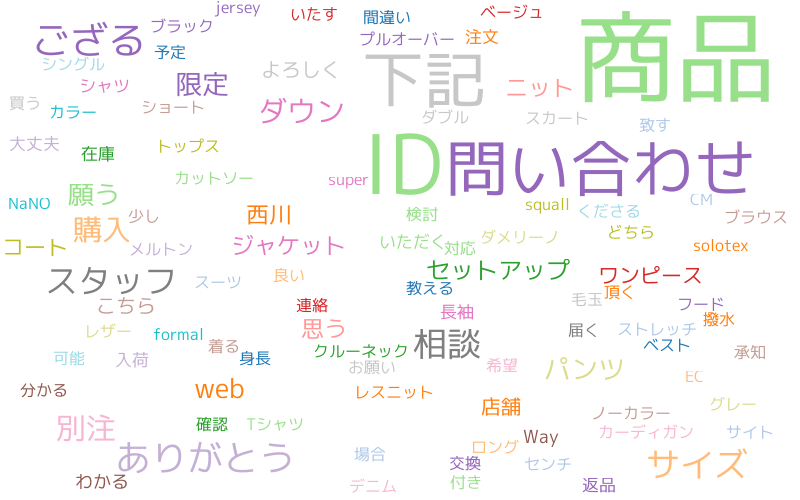

In [ ]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    # save=True
)

# [自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開しました](https://www.takapy.work/entry/2020/05/17/192947)

## N-gram bar chart

In [ ]:
# 1. N-gram bar chart
npt.bar_ngram(title='uni-gram', ngram=1, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 8837/8837 [00:00<00:00, 37708.45it/s]


In [ ]:
npt.bar_ngram(title='bi-gram', ngram=2, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 8837/8837 [00:00<00:00, 37715.16it/s]


## N-gram tree Map

In [ ]:
# 2. N-gram tree Map
npt.treemap(title='Tree of Most Common Words', ngram=1, top_n=30, stopwords=stopwords, save=True)

100%|██████████| 8837/8837 [00:00<00:00, 35772.39it/s]


## Histogram of the word count

In [ ]:
# 3. Histogram of the word count
npt.word_distribution(title='words distribution', save=True)

## wordcloud

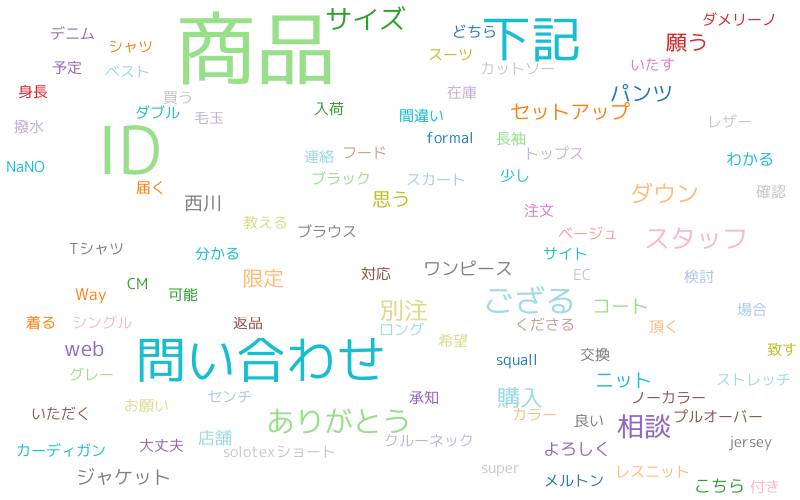

In [ ]:
# 4. wordcloud
npt.wordcloud(stopwords=stopwords, colormap='tab20_r', save=True)

## co-occurrence networks

In [ ]:
# 5. co-occurrence networks
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# >> node_size:70, edge_size:166
npt.co_network(title='Co-occurrence network', save=True)

node_size:534, edge_size:3311


## sunburst chart

In [ ]:
# 6. sunburst chart
npt.sunburst(title='sunburst chart', colorscale=True, save=True)

## pyLDAvis

In [ ]:
# 7. pyLDAvis
# If you want to run it in a notebook environment, you need to use the import and magic commands
import pyLDAvis
pyLDAvis.enable_notebook()
npt.ldavis(num_topics=5, passes=5, save=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.343789  0.134617       1        1  57.781157
4      0.173576  0.149235       2        1  17.687159
2      0.198842  0.035216       3        1  12.170297
0     -0.080891 -0.225674       4        1   6.315887
1      0.052263 -0.093396       5        1   6.045501, topic_info=        Term          Freq         Total Category  logprob  loglift
9         商品  10581.000000  10581.000000  Default  30.0000  30.0000
1         ID   6496.000000   6496.000000  Default  29.0000  29.0000
8          名   3283.000000   3283.000000  Default  28.0000  28.0000
16         2    657.000000    657.000000  Default  27.0000  27.0000
7         下記   3244.000000   3244.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
2832     ネット     24.449252     64.440086   Topic5  -5.2573   1.8367
2984    オーダー     19.938049     33.570492   Topic5  -5.4613   2.2848
2866     しまう     25.123391    109.822517   Topic5  -5.2301   1.3308
127   セットアップ     29.217743    249.583929   Topic5  -5.0791   0.6608
656        1     27.023734    310.330692   Topic5  -5.1572   0.3649

[304 rows x 6 columns], token_table=      Topic      Freq Term
term                      
656       1  0.006445    1
656       2  0.132117    1
656       3  0.070892    1
656       4  0.705699    1
656       5  0.087004    1
...     ...       ...  ...
4665      3  0.928875   頼む
2768      2  0.156058   願う
2768      3  0.772677   願う
2768      5  0.072320   願う
2625      2  0.992093    ￥

[511 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

In [ ]:
!ls -l *.html

-rw-r--r-- 1 root root 3548996 Jul 16 10:29  2021-07-16_bi-gram.html
-rw-r--r-- 1 root root 4328035 Jul 16 10:30 '2021-07-16_Co-occurrence network.html'
-rw-r--r-- 1 root root   51727 Jul 16 10:30  2021-07-16_pyldavis.html
-rw-r--r-- 1 root root 3584986 Jul 16 10:30 '2021-07-16_sunburst chart.html'
-rw-r--r-- 1 root root 3548251 Jul 16 10:29 '2021-07-16_Tree of Most Common Words.html'
-rw-r--r-- 1 root root 3548530 Jul 16 10:29  2021-07-16_uni-gram.html
-rw-r--r-- 1 root root 3569274 Jul 16 10:29 '2021-07-16_words distribution.html'


In [ ]:
%%bash
TODAY=$(date '+%Y-%m-%d')
zip ${TODAY}.zip *.html

  adding: 2021-07-16_bi-gram.html (deflated 70%)
  adding: 2021-07-16_Co-occurrence network.html (deflated 74%)
  adding: 2021-07-16_pyldavis.html (deflated 64%)
  adding: 2021-07-16_sunburst chart.html (deflated 70%)
  adding: 2021-07-16_Tree of Most Common Words.html (deflated 70%)
  adding: 2021-07-16_uni-gram.html (deflated 70%)
  adding: 2021-07-16_words distribution.html (deflated 70%)


In [ ]:
import datetime
from google.colab import files

dt_now = datetime.datetime.now()
today = dt_now.strftime('%Y-%m-%d')

files.download(f"{today}.zip".format(today))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>